In [1]:
import pandas as pd

In [2]:
clean_data = pd.read_csv("C:/Users/kaank/Desktop/Allergy Clean Data ML.csv")

In [3]:
clean_data.head(5)

,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,FISH_ALG_START,...,HAS_BRAZIL,HAS_HAZELNUT,HAS_CASHEW,GENDER_FACTOR_Male,RACE_FACTOR_Black,RACE_FACTOR_Other,RACE_FACTOR_Unknown,RACE_FACTOR_White,ETHNICITY_FACTOR_Non-Hispanic,PAYER_FACTOR_Non-Medicaid
0,2006,Female,Black,Non-Hispanic,Medicaid,False,0.093087,3.164956,8.724076,6.62869,...,False,False,False,False,True,False,False,False,True,False
1,1994,Female,White,Non-Hispanic,Non-Medicaid,False,12.232717,18.880219,8.724076,6.62869,...,False,False,False,False,False,False,False,True,True,True
2,2006,Male,White,Hispanic,Non-Medicaid,True,0.010951,6.726899,8.724076,6.62869,...,False,False,False,True,False,False,False,True,False,True
3,2004,Male,Unknown,Hispanic,Non-Medicaid,False,2.398357,9.111567,8.724076,6.62869,...,False,False,False,True,False,False,True,False,False,True
4,2006,Female,Black,Non-Hispanic,Non-Medicaid,False,0.013689,6.193018,8.724076,6.62869,...,False,False,False,False,True,False,False,False,True,True


In [4]:

clean_data["GENDER_FACTOR_Female"] = clean_data["GENDER_FACTOR"].apply(lambda x: 1 if x.strip() == "Female" else 0)

# RACE: Asian or Pacific Islander
clean_data["RACE_FACTOR_Asian or Pacific Islander"] = clean_data["RACE_FACTOR"].apply(lambda x: 1 if x.strip() == "Asian or Pacific Islander" else 0)

# ETHNICITY: Hispanic
clean_data["ETHNICITY_FACTOR_Hispanic"] = clean_data["ETHNICITY_FACTOR"].apply(lambda x: 1 if x.strip() == "Hispanic" else 0)


In [5]:
clean_data.head(5)

,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,FISH_ALG_START,...,GENDER_FACTOR_Male,RACE_FACTOR_Black,RACE_FACTOR_Other,RACE_FACTOR_Unknown,RACE_FACTOR_White,ETHNICITY_FACTOR_Non-Hispanic,PAYER_FACTOR_Non-Medicaid,GENDER_FACTOR_Female,RACE_FACTOR_Asian or Pacific Islander,ETHNICITY_FACTOR_Hispanic
0,2006,Female,Black,Non-Hispanic,Medicaid,False,0.093087,3.164956,8.724076,6.62869,...,False,True,False,False,False,True,False,1,0,0
1,1994,Female,White,Non-Hispanic,Non-Medicaid,False,12.232717,18.880219,8.724076,6.62869,...,False,False,False,False,True,True,True,1,0,0
2,2006,Male,White,Hispanic,Non-Medicaid,True,0.010951,6.726899,8.724076,6.62869,...,True,False,False,False,True,False,True,0,0,1
3,2004,Male,Unknown,Hispanic,Non-Medicaid,False,2.398357,9.111567,8.724076,6.62869,...,True,False,False,True,False,False,True,0,0,1
4,2006,Female,Black,Non-Hispanic,Non-Medicaid,False,0.013689,6.193018,8.724076,6.62869,...,False,True,False,False,False,True,True,1,0,0


In [6]:
print("GENDER_FACTOR_Female:")
print(clean_data["GENDER_FACTOR_Female"].value_counts())

print("\nRACE_FACTOR_Asian or Pacific Islander:")
print(clean_data["RACE_FACTOR_Asian or Pacific Islander"].value_counts())

print("\nETHNICITY_FACTOR_Hispanic:")
print(clean_data["ETHNICITY_FACTOR_Hispanic"].value_counts())

GENDER_FACTOR_Female:
GENDER_FACTOR_Female
0    169032
1    164168
Name: count, dtype: int64

RACE_FACTOR_Asian or Pacific Islander:
RACE_FACTOR_Asian or Pacific Islander
0    324048
1      9152
Name: count, dtype: int64

ETHNICITY_FACTOR_Hispanic:
ETHNICITY_FACTOR_Hispanic
0    317868
1     15332
Name: count, dtype: int64


In [7]:
clean_data["AGE"] = 2025 - clean_data["BIRTH_YEAR"]
clean_data[["BIRTH_YEAR", "AGE"]].head()

,BIRTH_YEAR,AGE
0,2006,19
1,1994,31
2,2006,19
3,2004,21
4,2006,19


AGE & HAS_ Correlation Relation

In [8]:
has_cols = [col for col in clean_data.columns if col.startswith("HAS_")]
corr_cols = ["AGE"] + has_cols

corr_matrix = clean_data[corr_cols].corr()
age_corr = corr_matrix.loc[["AGE"], has_cols].T.sort_values(by="AGE", ascending=False)

print(age_corr)

                    AGE
HAS_SHELLFISH  0.025094
HAS_TREENUT   -0.000194
HAS_BRAZIL    -0.003094
HAS_FISH      -0.003128
HAS_PECAN     -0.005326
HAS_HAZELNUT  -0.006054
HAS_ALMOND    -0.007818
HAS_PISTACH   -0.010120
HAS_WALNUT    -0.010424
HAS_SESAME    -0.017337
HAS_CASHEW    -0.019394
HAS_WHEAT     -0.020220
HAS_SOY       -0.040731
HAS_PEANUT    -0.043924
HAS_EGG       -0.070562
HAS_MILK      -0.079456


C:\Users\kaank\AppData\Local\Temp\ipykernel_32372\182709211.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_corr["AGE"], y=age_corr.index, palette="coolwarm")


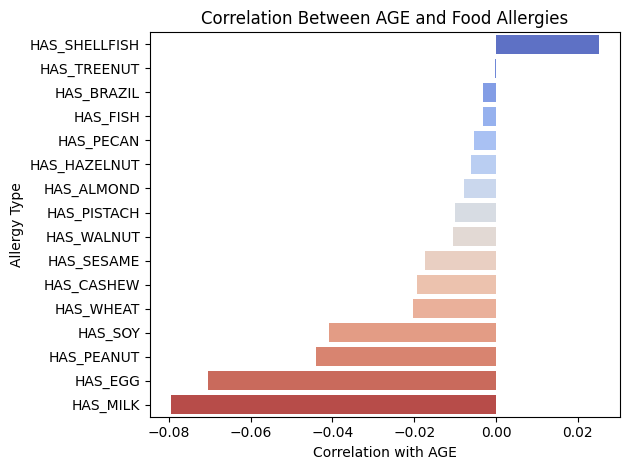

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=age_corr["AGE"], y=age_corr.index, palette="coolwarm")
plt.title("Correlation Between AGE and Food Allergies")
plt.xlabel("Correlation with AGE")
plt.ylabel("Allergy Type")
plt.tight_layout()
plt.show()

Interpretation of Correlation Between AGE and Food Allergies

1.Most food allergies show a negative correlation with age, although the strength of the correlations is weak. 2.This suggests that certain food allergies may be more common in younger individuals, particularly in childhood. 3.Results indicate that milk, egg, peanut, and soy allergies are more frequently observed in younger age groups. 4.Shellfish allergies tend to appear later in life or persist more strongly into adulthood

Childhood-onset allergies (e.g., milk, egg) tend to decrease with age.

Adult-onset allergies (e.g., shellfish) may become more prevalent with age.

GENDER & HAS_ Correlation Relation

In [11]:
gender_cols = ["GENDER_FACTOR_Male", "GENDER_FACTOR_Female"]
has_cols = [col for col in clean_data.columns if col.startswith("HAS_")]

corr_cols = gender_cols + has_cols
correlation_matrix_gender = clean_data[corr_cols].corr()

gender_male_corr = correlation_matrix_gender.loc["GENDER_FACTOR_Male", has_cols]
gender_female_corr = correlation_matrix_gender.loc["GENDER_FACTOR_Female", has_cols]

gender_corr_df = pd.DataFrame({
    "Correlation_with_Male": gender_male_corr,
    "Correlation_with_Female": gender_female_corr}).sort_values(by="Correlation_with_Male", ascending=False)

print(gender_corr_df)

               Correlation_with_Male  Correlation_with_Female
HAS_PEANUT                  0.030284                -0.030284
HAS_EGG                     0.030232                -0.030232
HAS_MILK                    0.023158                -0.023158
HAS_SOY                     0.018727                -0.018727
HAS_WHEAT                   0.016984                -0.016984
HAS_SESAME                  0.013087                -0.013087
HAS_FISH                    0.011059                -0.011059
HAS_SHELLFISH               0.008039                -0.008039
HAS_CASHEW                  0.006502                -0.006502
HAS_PECAN                   0.005220                -0.005220
HAS_HAZELNUT                0.003629                -0.003629
HAS_WALNUT                  0.002989                -0.002989
HAS_PISTACH                 0.001770                -0.001770
HAS_TREENUT                 0.001707                -0.001707
HAS_BRAZIL                  0.001472                -0.001472
HAS_ALMO

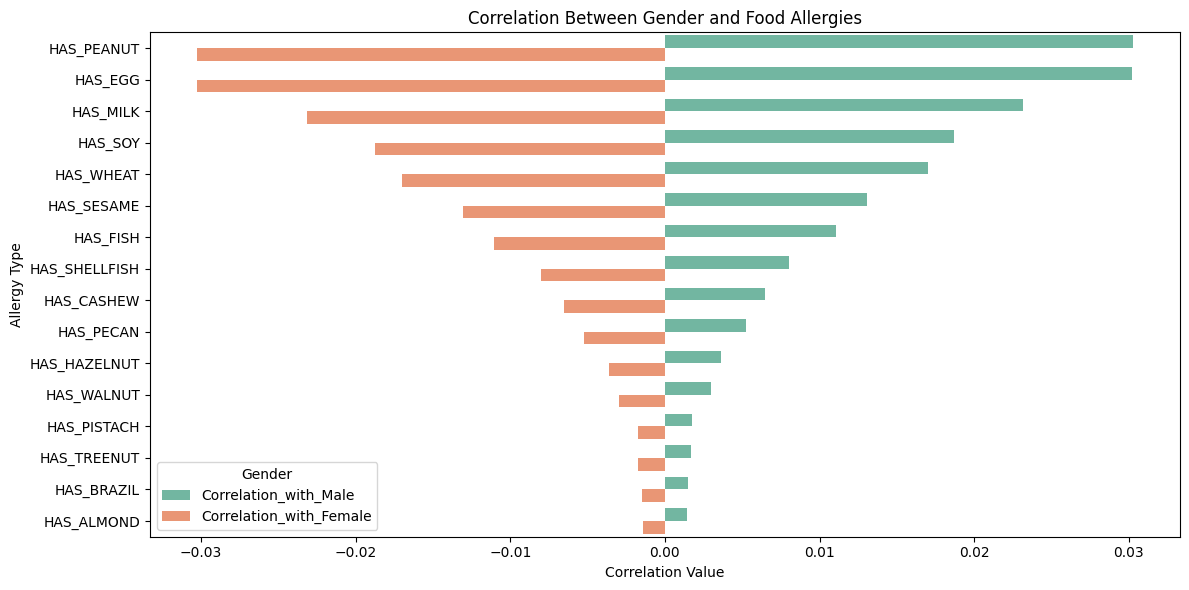

In [12]:
gender_corr_plot_df = gender_corr_df.reset_index().melt(
    id_vars="index", 
    value_vars=["Correlation_with_Male", "Correlation_with_Female"],
    var_name="Gender", 
    value_name="Correlation")
gender_corr_plot_df.rename(columns={"index": "Allergy"}, inplace=True)


plt.figure(figsize=(12, 6))
sns.barplot(data=gender_corr_plot_df, x="Correlation", y="Allergy", hue="Gender", palette="Set2")

plt.title("Correlation Between Gender and Food Allergies")
plt.xlabel("Correlation Value")
plt.ylabel("Allergy Type")
plt.tight_layout()
plt.show()

Interpretation of Correlation Between Gender and Food Allergies

Allergies like peanut, egg, milk, soy, and wheat show slightly stronger positive correlations with male gender.

The female correlations for these same allergies are slightly negative.

The strength of correlations is weak overall (all values close to 0), but the trend suggests a minor gender-based pattern in allergy prevalence.

ETHNICITY & HAS_ Correlation Relation

In [13]:
ethnicity_cols = [col for col in clean_data.columns if col.startswith("ETHNICITY_FACTOR_")]
has_cols = [col for col in clean_data.columns if col.startswith("HAS_")]

corr_cols = ethnicity_cols + has_cols
correlation_matrix_ethnicity = clean_data[corr_cols].corr()

ethnicity_corr_df = correlation_matrix_ethnicity.loc[ethnicity_cols, has_cols].T

ethnicity_corr_df.columns = [col.replace("ETHNICITY_FACTOR_", "") for col in ethnicity_corr_df.columns]

print(ethnicity_corr_df)

               Non-Hispanic  Hispanic
HAS_SHELLFISH      0.007525 -0.007525
HAS_FISH           0.002082 -0.002082
HAS_MILK           0.001508 -0.001508
HAS_SOY            0.001908 -0.001908
HAS_EGG            0.001508 -0.001508
HAS_WHEAT          0.000913 -0.000913
HAS_PEANUT         0.010823 -0.010823
HAS_SESAME         0.003364 -0.003364
HAS_TREENUT        0.000380 -0.000380
HAS_WALNUT         0.002619 -0.002619
HAS_PECAN          0.001526 -0.001526
HAS_PISTACH        0.000852 -0.000852
HAS_ALMOND         0.002847 -0.002847
HAS_BRAZIL         0.000129 -0.000129
HAS_HAZELNUT       0.000854 -0.000854
HAS_CASHEW         0.005525 -0.005525


C:\Users\kaank\AppData\Local\Temp\ipykernel_32372\4203527941.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hispanic_corr.values, y=hispanic_corr.index, palette="coolwarm")


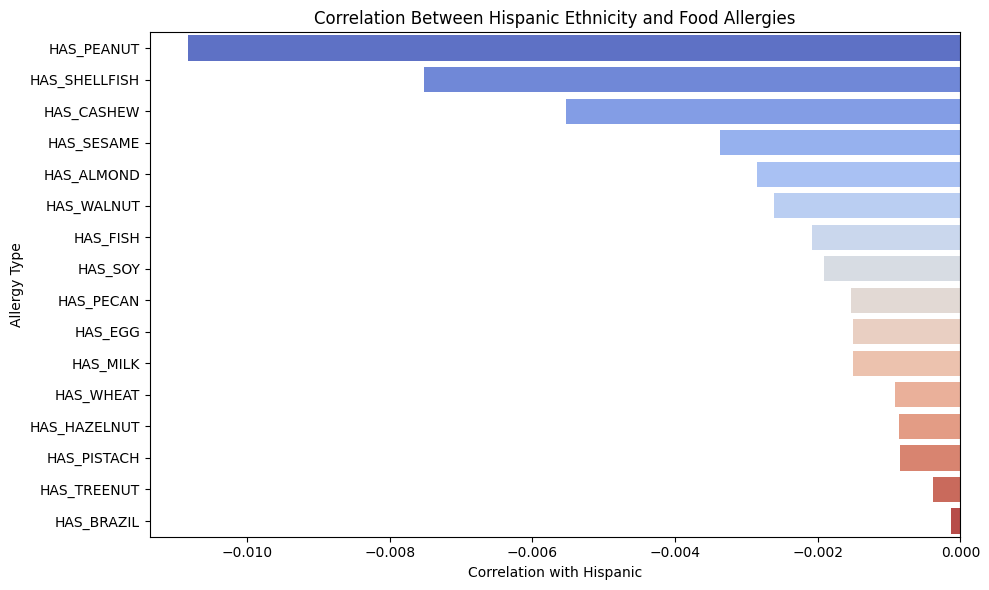

In [14]:
hispanic_corr = ethnicity_corr_df["Hispanic"].sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=hispanic_corr.values, y=hispanic_corr.index, palette="coolwarm")

plt.title("Correlation Between Hispanic Ethnicity and Food Allergies")
plt.xlabel("Correlation with Hispanic")
plt.ylabel("Allergy Type")
plt.tight_layout()
plt.show()

Interpretation: Ethnicity and Food Allergy Correlation The chart presents the correlation between ethnicity and the presence of food allergies, comparing Hispanic and Non-Hispanic individuals. Non-Hispanic individuals show slightly higher positive correlations across most allergy types, especially:PEANUT, SHELLFISH, and CASHEW. Hispanic individuals, by contrast, show negative or near-zero correlations for many allergy types. They may be less likely to report certain food allergies, or these allergies are less prevalent in this group

Ethnicity appears to have a subtle influence on food allergy prevalence. Cultural, dietary, or genetic factors might contribute to these differences

Race & HAS_ Correlation Relation

In [15]:
race_cols = [col for col in clean_data.columns if col.startswith("RACE_FACTOR_")]
has_cols = [col for col in clean_data.columns if col.startswith("HAS_")]

corr_cols = race_cols + has_cols
correlation_matrix_race = clean_data[corr_cols].corr()

race_corr_df = correlation_matrix_race.loc[race_cols, has_cols].T

race_corr_df.columns = [col.replace("RACE_FACTOR_", "") for col in race_corr_df.columns]

print(race_corr_df)

                  Black     Other   Unknown     White  \
HAS_SHELLFISH  0.073819 -0.002359 -0.016713 -0.063343   
HAS_FISH       0.039504  0.001162 -0.007825 -0.037411   
HAS_MILK      -0.015154  0.007200 -0.008099  0.012579   
HAS_SOY       -0.011100  0.006145 -0.008639  0.009608   
HAS_EGG       -0.013710  0.005952 -0.004049  0.000107   
HAS_WHEAT     -0.002742  0.001395 -0.003718 -0.001078   
HAS_PEANUT     0.005401  0.001691 -0.015186 -0.005060   
HAS_SESAME    -0.012086  0.002747 -0.001740  0.005869   
HAS_TREENUT   -0.001117 -0.000135 -0.000648  0.001567   
HAS_WALNUT    -0.006980  0.001491 -0.004878  0.005347   
HAS_PECAN     -0.003077  0.000378  0.000620  0.000662   
HAS_PISTACH   -0.004618 -0.000257  0.000457  0.003446   
HAS_ALMOND    -0.003932  0.001913 -0.001459  0.003661   
HAS_BRAZIL    -0.004595 -0.001112  0.000413  0.004473   
HAS_HAZELNUT  -0.009154  0.000673  0.000303  0.007187   
HAS_CASHEW    -0.010072  0.001537 -0.002660  0.009178   

               Asian or Pacifi

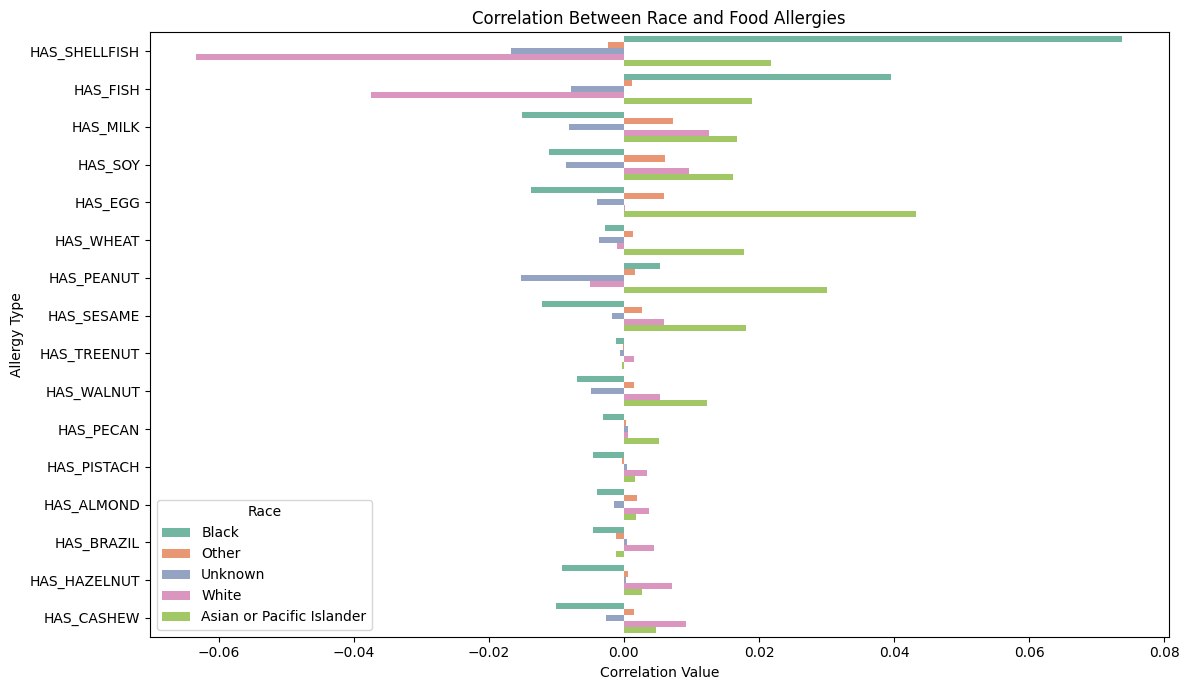

In [16]:
race_corr_long_df = race_corr_df.reset_index().melt(
    id_vars="index", 
    var_name="Race", 
    value_name="Correlation")
race_corr_long_df.rename(columns={"index": "Allergy"}, inplace=True)

plt.figure(figsize=(12, 7))
sns.barplot(data=race_corr_long_df, x="Correlation", y="Allergy", hue="Race", palette="Set2")

plt.title("Correlation Between Race and Food Allergies")
plt.xlabel("Correlation Value")
plt.ylabel("Allergy Type")
plt.tight_layout()
plt.show()

Interpretation 
Black individuals show a slight positive correlation with allergies like shellfish and fish.

White individuals show slight negative correlations across several allergies.

Asian or Pacific Islander individuals have a mild positive correlation with egg allergies.

Other and Unknown groups show very weak or inconsistent patterns.

Overall, while the correlations are small, there are minor patterns that suggest race may have a subtle influence on allergy prevalence.

Allergy Group;

In [17]:
clean_data["GROUP_DAIRY"] = (clean_data["HAS_MILK"] | clean_data["HAS_EGG"]).astype(int)

clean_data["GROUP_NUT"] = (
    clean_data["HAS_PECAN"] |
    clean_data["HAS_ALMOND"] |
    clean_data["HAS_WALNUT"] |
    clean_data["HAS_PISTACH"] |
    clean_data["HAS_CASHEW"] |
    clean_data["HAS_HAZELNUT"] |
    clean_data["HAS_BRAZIL"] |
    clean_data["HAS_TREENUT"]
).astype(int)

clean_data["GROUP_GRAIN"] = (clean_data["HAS_WHEAT"] | clean_data["HAS_SOY"]).astype(int)

clean_data["GROUP_FISH"] = (clean_data["HAS_FISH"] | clean_data["HAS_SHELLFISH"]).astype(int)

clean_data["GROUP_SEED"] = clean_data["HAS_SESAME"].astype(int)

clean_data["GROUP_PEANUT"] = clean_data["HAS_PEANUT"].astype(int)

CHI2 TEST

In [18]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

GROUP_DAIRY Chi2 Test

In [29]:
chi_features = [col for col in clean_data.columns if any(prefix in col for prefix in ["GENDER_FACTOR_", "RACE_FACTOR_", "ETHNICITY_FACTOR_"])]

y = clean_data["GROUP_DAIRY"]
X = clean_data[chi_features]

X_scaled = MinMaxScaler().fit_transform(X)

chi_scores, p_vals = chi2(X_scaled, y)

chi2_df_dairy = pd.DataFrame({
    "Feature": chi_features,
    "Chi2 Score": chi_scores,
    "p-value": p_vals}).sort_values(by="Chi2 Score", ascending=False)

print(chi2_df)

                                 Feature  Chi2 Score       p-value
7  RACE_FACTOR_Asian or Pacific Islander  371.988614  6.905806e-83
6                   GENDER_FACTOR_Female  176.068907  3.497750e-40
0                     GENDER_FACTOR_Male  171.002416  4.469228e-39
1                      RACE_FACTOR_Black   90.329066  2.016681e-21
2                      RACE_FACTOR_Other   21.229635  4.074162e-06
4                      RACE_FACTOR_White   15.643017  7.649452e-05
3                    RACE_FACTOR_Unknown   14.581399  1.342330e-04
8              ETHNICITY_FACTOR_Hispanic    0.446558  5.039741e-01
5          ETHNICITY_FACTOR_Non-Hispanic    0.021539  8.833195e-01


Chi2 Test Interpretation – GROUP_DAIRY (Milk + Egg Allergy)

Race is a major factor in dairy allergy prevalence, especially among individuals identified as Asian or Pacific Islander, who show an exceptionally strong statistical association with dairy allergies.

Gender also plays a significant role, with both male and female groups showing strong association. This could be related to diagnosis/reporting behavior or biological differences.

Black and Other race categories also show significant relationships, although weaker than Asian background.

Chi2 Test - GROUP_NUT

In [20]:
chi_features = [col for col in clean_data.columns if any(prefix in col for prefix in ["GENDER_FACTOR_", "RACE_FACTOR_", "ETHNICITY_FACTOR_"])]

y = clean_data["GROUP_NUT"]
X = clean_data[chi_features]

X_scaled = MinMaxScaler().fit_transform(X)

chi_scores, p_vals = chi2(X_scaled, y)

chi2_df_nut = pd.DataFrame({
    "Feature": chi_features,
    "Chi2 Score": chi_scores,
    "p-value": p_vals}).sort_values(by="Chi2 Score", ascending=False)

print(chi2_df_nut)

                                 Feature  Chi2 Score       p-value
7  RACE_FACTOR_Asian or Pacific Islander   44.438166  2.625191e-11
1                      RACE_FACTOR_Black   22.270312  2.368401e-06
4                      RACE_FACTOR_White    9.318387  2.268656e-03
8              ETHNICITY_FACTOR_Hispanic    8.568708  3.419897e-03
3                    RACE_FACTOR_Unknown    6.302415  1.205736e-02
6                   GENDER_FACTOR_Female    3.725538  5.358636e-02
0                     GENDER_FACTOR_Male    3.618333  5.714609e-02
2                      RACE_FACTOR_Other    0.760620  3.831346e-01
5          ETHNICITY_FACTOR_Non-Hispanic    0.413302  5.202984e-01


Chi2 Test – Interpretation (Nut Allergy Group)
Asian or Pacific Islander race is again the most significantly associated group, suggesting a notable difference in nut allergy prevalence.

Black and White individuals also show statistically significant associations.

Hispanic ethnicity shows a significant relationship here, unlike in the dairy allergy test.

Gender does not appear as significant in this group — unlike what we saw with dairy allergies.

Chi2 Test - GROUP_GRAIN

In [22]:
chi_features = [col for col in clean_data.columns if any(prefix in col for prefix in ["GENDER_FACTOR_", "RACE_FACTOR_", "ETHNICITY_FACTOR_"])]

y = clean_data["GROUP_GRAIN"]
X = clean_data[chi_features]

X_scaled = MinMaxScaler().fit_transform(X)

chi_scores, p_vals = chi2(X_scaled, y)

chi2_df_grain = pd.DataFrame({
    "Feature": chi_features,
    "Chi2 Score": chi_scores,
    "p-value": p_vals}).sort_values(by="Chi2 Score", ascending=False)

print(chi2_df_grain)

                                 Feature  Chi2 Score       p-value
7  RACE_FACTOR_Asian or Pacific Islander  102.298243  4.776155e-24
6                   GENDER_FACTOR_Female   79.087089  5.943146e-19
0                     GENDER_FACTOR_Male   76.811309  1.880974e-18
1                      RACE_FACTOR_Black   29.689306  5.071381e-08
3                    RACE_FACTOR_Unknown   21.842012  2.960464e-06
2                      RACE_FACTOR_Other   16.297803  5.412667e-05
4                      RACE_FACTOR_White   12.294464  4.543038e-04
8              ETHNICITY_FACTOR_Hispanic    1.123545  2.891565e-01
5          ETHNICITY_FACTOR_Non-Hispanic    0.054193  8.159216e-01


Chi2 Test Interpretation – GROUP_GRAIN (Wheat + Soy Allergy)

Asian or Pacific Islander individuals show the strongest association with grain-related allergies.

Both female and male genders are significantly associated, suggesting possible overall higher prevalence or reporting rates across gender.

Black individuals also show a meaningful association.

Ethnicity (Hispanic / Non-Hispanic) did not appear among the most significant, indicating limited or no relationship in this group.

In [ ]:
Chi2 Test - GROUP_FISH

In [23]:
chi_features = [col for col in clean_data.columns if any(prefix in col for prefix in ["GENDER_FACTOR_", "RACE_FACTOR_", "ETHNICITY_FACTOR_"])]

y = clean_data["GROUP_FISH"]
X = clean_data[chi_features]

X_scaled = MinMaxScaler().fit_transform(X)

chi_scores, p_vals = chi2(X_scaled, y)

chi2_df_fish = pd.DataFrame({
    "Feature": chi_features,
    "Chi2 Score": chi_scores,
    "p-value": p_vals}).sort_values(by="Chi2 Score", ascending=False)

print(chi2_df_fish)

                                 Feature   Chi2 Score        p-value
1                      RACE_FACTOR_Black  1419.864218  1.013710e-310
4                      RACE_FACTOR_White   699.037951  4.840700e-154
7  RACE_FACTOR_Asian or Pacific Islander   193.347034   5.912600e-44
3                    RACE_FACTOR_Unknown    74.630325   5.676453e-18
6                   GENDER_FACTOR_Female    16.310395   5.376819e-05
0                     GENDER_FACTOR_Male    15.841053   6.889148e-05
8              ETHNICITY_FACTOR_Hispanic    15.608432   7.790639e-05
2                      RACE_FACTOR_Other     1.060433   3.031165e-01
5          ETHNICITY_FACTOR_Non-Hispanic     0.752855   3.855739e-01


Chi2 Test Interpretation – GROUP_FISH

Race is the dominant factor in fish and shellfish allergy association.

Black individuals show extremely high statistical association, suggesting either higher prevalence or stronger diagnosis/reporting.

White and Asian/Pacific Islander groups are also significantly associated.

Female gender shows a mild but still significant association.

Interestingly, ethnicity (Hispanic / Non-Hispanic) does not show significance here either.



Chi2 Test - GROUP_SEED

In [24]:
chi_features = [col for col in clean_data.columns if any(prefix in col for prefix in ["GENDER_FACTOR_", "RACE_FACTOR_", "ETHNICITY_FACTOR_"])]

y = clean_data["GROUP_SEED"]
X = clean_data[chi_features]

X_scaled = MinMaxScaler().fit_transform(X)

chi_scores, p_vals = chi2(X_scaled, y)

chi2_df_seed = pd.DataFrame({
    "Feature": chi_features,
    "Chi2 Score": chi_scores,
    "p-value": p_vals}).sort_values(by="Chi2 Score", ascending=False)

print(chi2_df_seed)

                                 Feature  Chi2 Score       p-value
7  RACE_FACTOR_Asian or Pacific Islander  105.056100  1.187264e-24
1                      RACE_FACTOR_Black   34.385400  4.521021e-09
6                   GENDER_FACTOR_Female   28.950987  7.423298e-08
0                     GENDER_FACTOR_Male   28.117905  1.141450e-07
4                      RACE_FACTOR_White    5.162657  2.307756e-02
8              ETHNICITY_FACTOR_Hispanic    3.597104  5.788030e-02
2                      RACE_FACTOR_Other    2.499951  1.138498e-01
3                    RACE_FACTOR_Unknown    0.885329  3.467461e-01
5          ETHNICITY_FACTOR_Non-Hispanic    0.173502  6.770178e-01


Chi2 Test Interpretation – GROUP_SEED

Asian or Pacific Islander individuals show the strongest association with sesame allergy.

Both Black individuals and White individuals have statistically significant relationships, though to varying degrees.

Gender (both male and female) shows meaningful association, similar to the grain allergy pattern.

Once again, ethnicity (Hispanic / Non-Hispanic) is not statistically significant in this allergy group.

Chi2 Test - GROUP_PEANUT

In [25]:
chi_features = [col for col in clean_data.columns if any(prefix in col for prefix in ["GENDER_FACTOR_", "RACE_FACTOR_", "ETHNICITY_FACTOR_"])]

y = clean_data["GROUP_PEANUT"]
X = clean_data[chi_features]

X_scaled = MinMaxScaler().fit_transform(X)

chi_scores, p_vals = chi2(X_scaled, y)

chi2_df_peanut = pd.DataFrame({
    "Feature": chi_features,
    "Chi2 Score": chi_scores,
    "p-value": p_vals}).sort_values(by="Chi2 Score", ascending=False)

print(chi2_df_peanut)

                                 Feature  Chi2 Score       p-value
7  RACE_FACTOR_Asian or Pacific Islander  292.746681  1.253398e-65
6                   GENDER_FACTOR_Female  155.023206  1.383957e-35
0                     GENDER_FACTOR_Male  150.562318  1.306327e-34
3                    RACE_FACTOR_Unknown   67.396890  2.219988e-16
8              ETHNICITY_FACTOR_Hispanic   37.231102  1.049269e-09
1                      RACE_FACTOR_Black    6.865877  8.785714e-03
4                      RACE_FACTOR_White    3.837720  5.011161e-02
5          ETHNICITY_FACTOR_Non-Hispanic    1.795800  1.802211e-01
2                      RACE_FACTOR_Other    0.947306  3.304059e-01


Chi2 Test Interpretation – GROUP_PEANUT

Asian or Pacific Islander individuals again show the strongest association with peanut allergy — consistent with previous allergy group patterns.

Gender (both male and female) is highly significant, suggesting a consistent pattern of reporting or biological susceptibility.

Hispanic ethnicity appears significant here, unlike in other allergy groups such as dairy or grain.

These findings suggest race and gender are strong predictors of peanut allergy risk in this dataset.

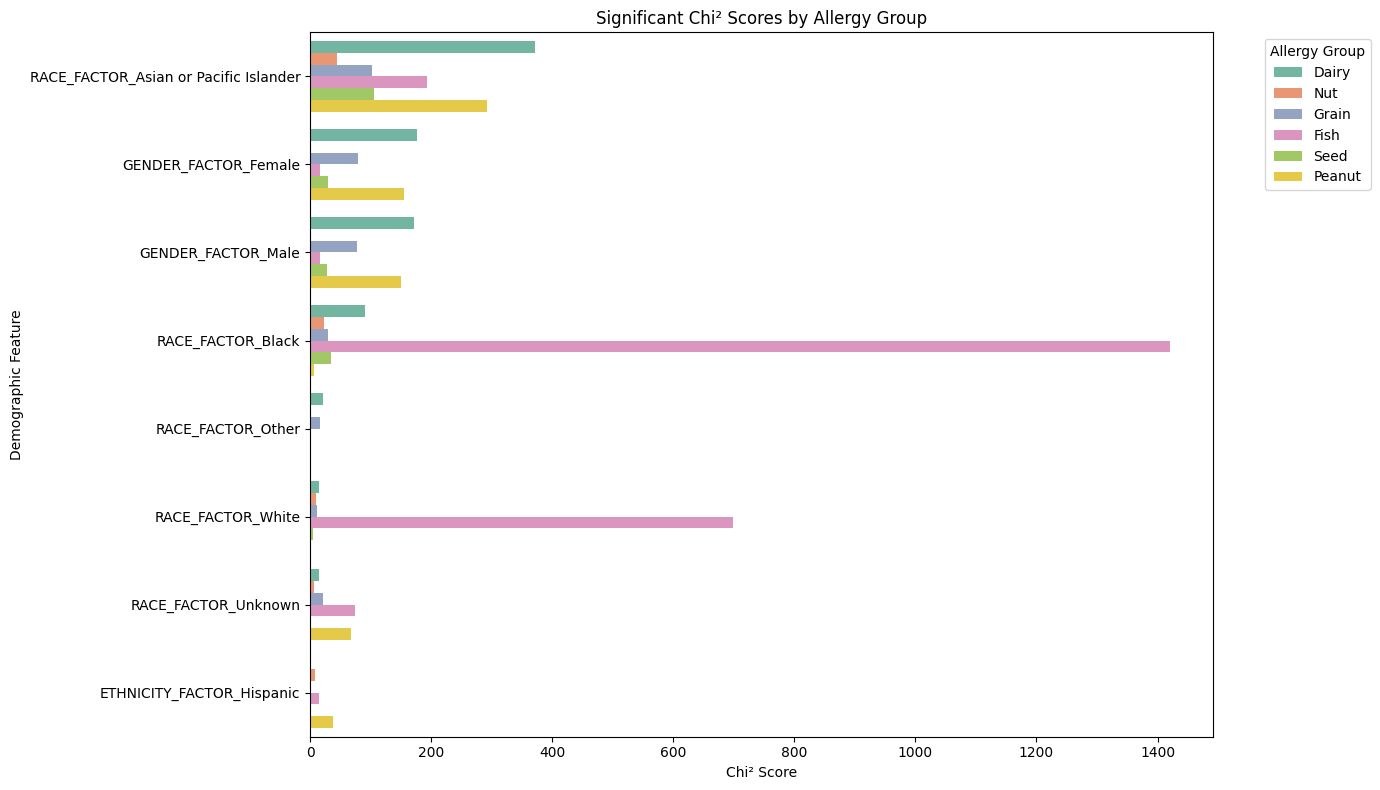

In [30]:
chi2_combined_df = pd.concat([
    chi2_df_dairy.assign(Group="Dairy"),
    chi2_df_nut.assign(Group="Nut"),
    chi2_df_grain.assign(Group="Grain"),
    chi2_df_fish.assign(Group="Fish"),
    chi2_df_seed.assign(Group="Seed"),
    chi2_df_peanut.assign(Group="Peanut")])

chi2_significant = chi2_combined_df[chi2_combined_df["p-value"] < 0.05]

plt.figure(figsize=(14, 8))
sns.barplot(
    data=chi2_significant,
    x="Chi2 Score",
    y="Feature",
    hue="Group",
    dodge=True,
    palette="Set2")

plt.title("Significant Chi² Scores by Allergy Group")
plt.xlabel("Chi² Score")
plt.ylabel("Demographic Feature")
plt.legend(title="Allergy Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This chart visualizes the statistically significant Chi2 scores between demographic features and various food allergy groups (Dairy, Nut, Grain, Fish, Seed, and Peanut). The higher the Chi2 score, the stronger the association between the demographic factor and the allergy group.

    Race is the most influential factor, especially:

Black individuals show an extremely strong association with fish allergies, far exceeding all other groups.

Asian or Pacific Islander individuals have consistently high Chi2 scores across Dairy, Nut, Grain, Seed, and Peanut allergies.

White race also shows a strong relationship with fish allergies.

Gender (Male and Female) is significantly associated with:

Dairy, Grain, and Peanut allergies.

This suggests a gender-related variance in either prevalence or diagnosis/reporting rates for these allergy types.

Hispanic ethnicity shows moderate significance for Peanut and Nut allergies, but not across other groups — indicating ethnicity may only be relevant to specific allergy types.

The Chi2 analysis highlights clear demographic patterns in food allergy prevalence.
Race and gender emerge as the most consistent and impactful predictors, while ethnicity shows group-specific significance. These insights can support more targeted awareness, screening, and public health strategies.